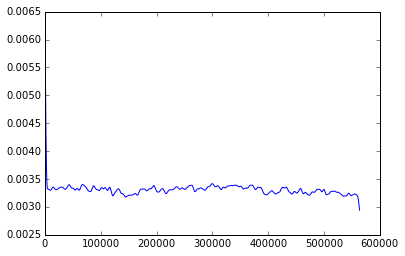

In [3]:
% matplotlib inline

import numpy 
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess



data= numpy.fromfile('C:\\Users\\zcbtjro\\Downloads\\Stim_3_speed.dat', '>d')
x = range(0, len(data))
absdata = [abs(k) for k in data]
absdata = numpy.array(absdata)
#filtered = lowess(absdata, x, is_sorted=True, frac=0.025, it=0)


def smooth(x,window_len=10000,window='hanning'):
        if x.ndim != 1:
                raise ValueError, "smooth only accepts 1 dimension arrays."
        if x.size < window_len:
                raise ValueError, "Input vector needs to be bigger than window size."
        if window_len<3:
                return x
        if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
                raise ValueError, "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'"
        s=numpy.r_[2*x[0]-x[window_len-1::-1],x,2*x[-1]-x[-1:-window_len:-1]]
        if window == 'flat': #moving average
                w=numpy.ones(window_len,'d')
        else:  
                w=eval('numpy.'+window+'(window_len)')
        y=numpy.convolve(w/w.sum(),s,mode='same')
        return y[window_len:-window_len+1]
# i stole this from  http://www.scipy.org/Cookbook/SignalSmooth:
smoothed = smooth(absdata)

plt.plot(x, smoothed)

plt.show()

# plt.figure()

# plt.plot(x, absdata, 'r')

# plt.plot(filtered[:,0], filtered[:,1], 'b')

# plt.show()

# print'fk'